# Import Library

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

/anaconda3/envs/datascience-env/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/anisayari/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Import Data

In [2]:
train = pd.read_csv("X_train.csv", index_col=0, error_bad_lines=False)
test = pd.read_csv("X_test.csv", index_col=0, error_bad_lines=False)
y = pd.read_csv("y_train.csv", index_col=0)

len_train = len(train)
print('train shape = {}, test shape = {}'.format(train.shape, test.shape))

train shape = (8880, 30), test shape = (2960, 30)


b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 0 to 8879
Data columns (total 31 columns):
images_count           8880 non-null int64
image_width            8823 non-null float64
image_height           8823 non-null float64
image_url              8823 non-null object
product_description    8880 non-null object
product_size           2414 non-null object
material               3947 non-null object
age                    120 non-null object
warranty               101 non-null object
year                   1497 non-null float64
color                  5321 non-null object
product_width          107 non-null float64
wifi                   83 non-null object
condition              8856 non-null object
product_length         90 non-null float64
shoe_size              223 non-null float64
vintage                5890 non-null object
brand                  4329 non-null object
author                 1412 non-null object
editor                 1437 non-null object
product_height  

In [3]:
train_test = pd.concat((train, test), axis=0)
train_test=train_test.reset_index(drop=True)
print('train_test = {}'.format(train_test.shape))

train_test = (11840, 30)


In [4]:
numerical_columns = train_test.select_dtypes(['int64','float64']).columns.tolist()
object_columns = train_test.select_dtypes(['object']).columns.tolist()

In [5]:
train_with_labels = train
train_with_labels['label'] = y

0    3027
2    2953
1    2900
Name: label, dtype: int64


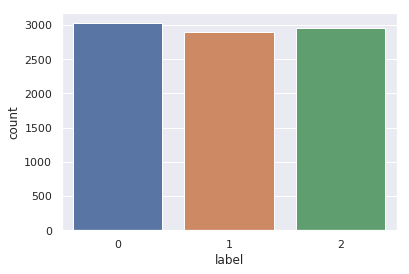

In [6]:
# Distribution of target feature 
print(train_with_labels.label.value_counts())
sns.countplot(x='label', data=train_with_labels)

# Descriptive Analysis

In [7]:
train_test.describe(include='all').T

count unique  \
images_count         11840    NaN   
image_width          11770    NaN   
image_height         11770    NaN   
image_url            11770  11681   
product_description  11840  11768   
product_size          3232     33   
material              5252   2174   
age                    168     18   
warranty               127      2   
year                  1983    NaN   
color                 7062     18   
product_width          153    NaN   
wifi                   101      2   
condition            11813      5   
product_length         131    NaN   
shoe_size              300    NaN   
vintage               7810      2   
brand                 5764   3329   
author                1883   1303   
editor                1910    800   
product_height         163    NaN   
weight               11836    NaN   
price                11840    NaN   
category             11835     11   
sub_category_1        9704    172   
sub_category_2        4780    158   
sub_category_3        1228    127   
sub_category_4          92     47   
product_name         10779  10524   
store_name           11840     46   

                                                                   top  freq  \
images_count                                                       NaN   NaN   
image_width                                                        NaN   NaN   
image_height                                                       NaN   NaN   
image_url            https://d1kvfoyrif6wzg.cloudfront.net/assets/i...     5   
product_description  <br>Fabriqué à par les artisans-apprenants d'E...     8   
product_size                                                        38   524   
material                                                         Coton   202   
age                                                                 4a    19   
warranty                                                        6 mois   126   
year                                                               NaN   NaN   
color                                                      Multicolore  1425   
product_width                                                      NaN   NaN   
wifi                                                              True    78   
condition                                                     bon état  6049   
product_length                                                     NaN   NaN   
shoe_size                                                          NaN   NaN   
vintage                                                          False  5082   
brand                                                              tmp   120   
author                                                           Hergé    29   
editor                                                          Pocket   110   
product_height                                                     NaN   NaN   
weight                                                             NaN   NaN   
price                                                              NaN   NaN   
category                                                          mode  3964   
sub_category_1                                                    mode   666   
sub_category_2                                         label selection  1508   
sub_category_3                         les coups de coeur des vendeurs    94   
sub_category_4                         les coups de coeur des vendeurs     7   
product_name                                             carte postale     8   
store_name                                                 Emmaüs Lyon  1198   

                        mean      std  min     25%   50%   75%          max  
images_count         3.65465  2.05784    0       2     3     5           29  
image_width          1804.89  1021.47   58    1000  1536  2448         5472  
image_height         1800.66  1103.08   64  962.75  1536  2448         6016  
image_url                NaN      NaN  NaN     NaN   NaN   NaN          NaN  
pr

In [8]:
# Percetage of NaN values in Train
train.isna().mean().round(3) * 100

images_count            0.0
image_width             0.6
image_height            0.6
image_url               0.6
product_description     0.0
product_size           72.8
material               55.6
age                    98.6
warranty               98.9
year                   83.1
color                  40.1
product_width          98.8
wifi                   99.1
condition               0.3
product_length         99.0
shoe_size              97.5
vintage                33.7
brand                  51.2
author                 84.1
editor                 83.8
product_height         98.7
weight                  0.0
price                   0.0
category                0.0
sub_category_1         17.9
sub_category_2         59.2
sub_category_3         89.6
sub_category_4         99.2
product_name            9.2
store_name              0.0
label                   0.0
dtype: float64

In [9]:
# Percetage of NaN values in Test
test.isna().mean().round(3) * 100

images_count            0.0
image_width             0.4
image_height            0.4
image_url               0.4
product_description     0.0
product_size           72.4
material               55.9
age                    98.4
warranty               99.1
year                   83.6
color                  41.2
product_width          98.4
wifi                   99.4
condition               0.1
product_length         98.6
shoe_size              97.4
vintage                35.1
brand                  51.5
author                 84.1
editor                 84.0
product_height         98.3
weight                  0.1
price                   0.0
category                0.1
sub_category_1         18.5
sub_category_2         60.8
sub_category_3         89.8
sub_category_4         99.3
product_name            8.3
store_name              0.0
dtype: float64

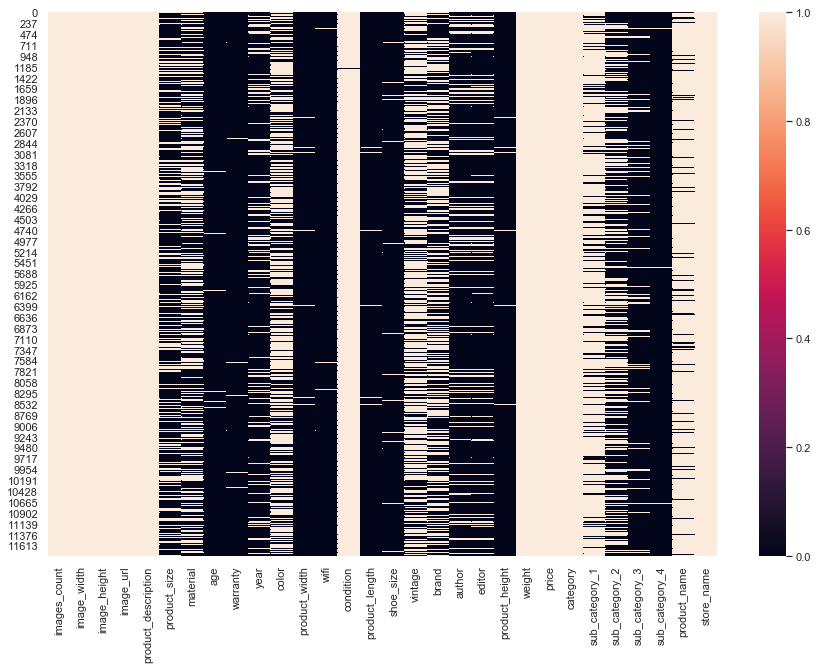

In [10]:
plt.figure(figsize=(15,10))

arr = train_test.copy().notnull().astype('int')
sns.heatmap(arr)

# Correlation Matrix (Train with labels)

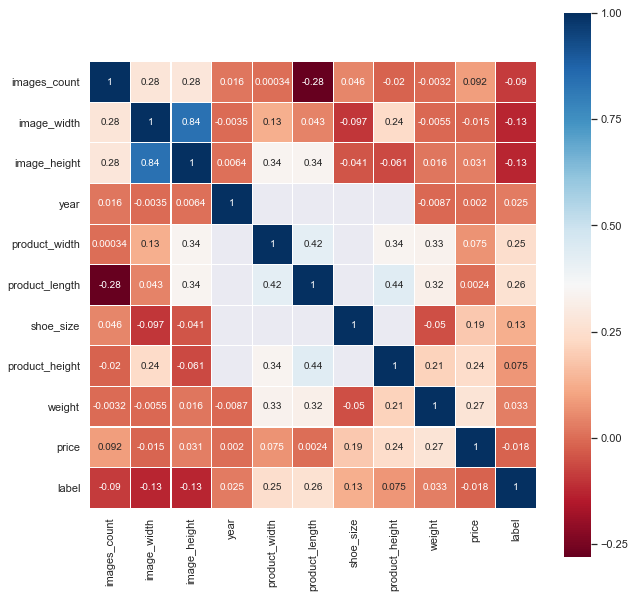

In [11]:
statistique_test = 'pearson'
plt.figure(figsize=(10,10))
sns.heatmap(
    train_with_labels.corr(statistique_test),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

# Correlation Matrix (train_test)

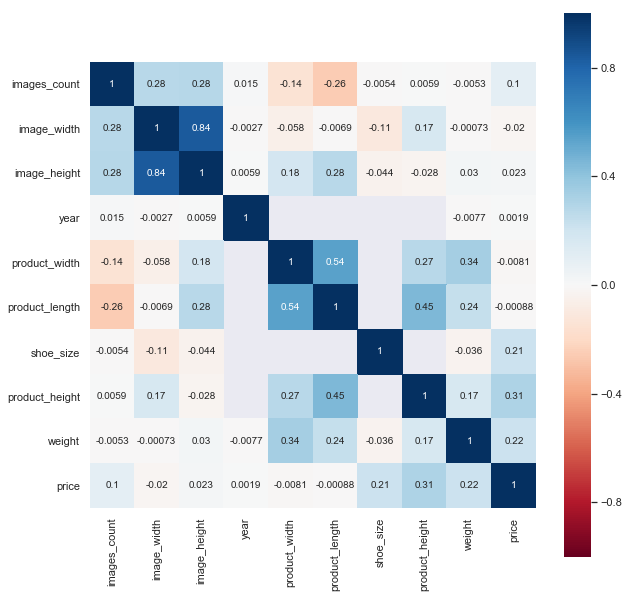

In [12]:
statistique_test = 'pearson'
plt.figure(figsize=(10,10))
sns.heatmap(
    train_test.corr(statistique_test),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    vmin = -1.0,
    linecolor='white',
    square=True,
    annot=True
)

# Boxplot

In [13]:
def display_boxplot(columns_to_consider, df):
    plt.figure(figsize=(20,25))
    i=0
    for columns_ in columns_to_consider:
        i+=1
        plt.subplot(5, 4, i)
        sns.boxplot(x=df["label"], y=columns_, data=df, palette = "viridis")

    plt.show()

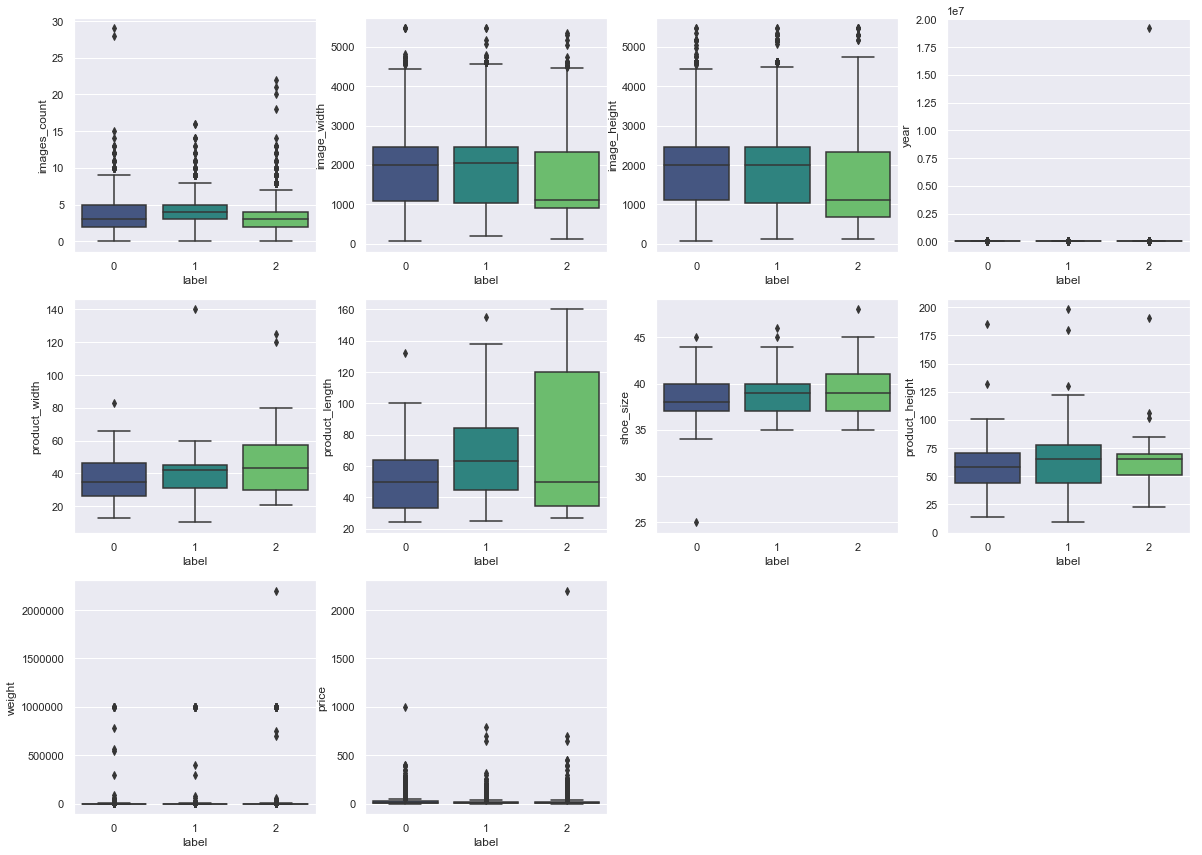

In [14]:
display_boxplot(numerical_columns, train_with_labels)

# Pairplot

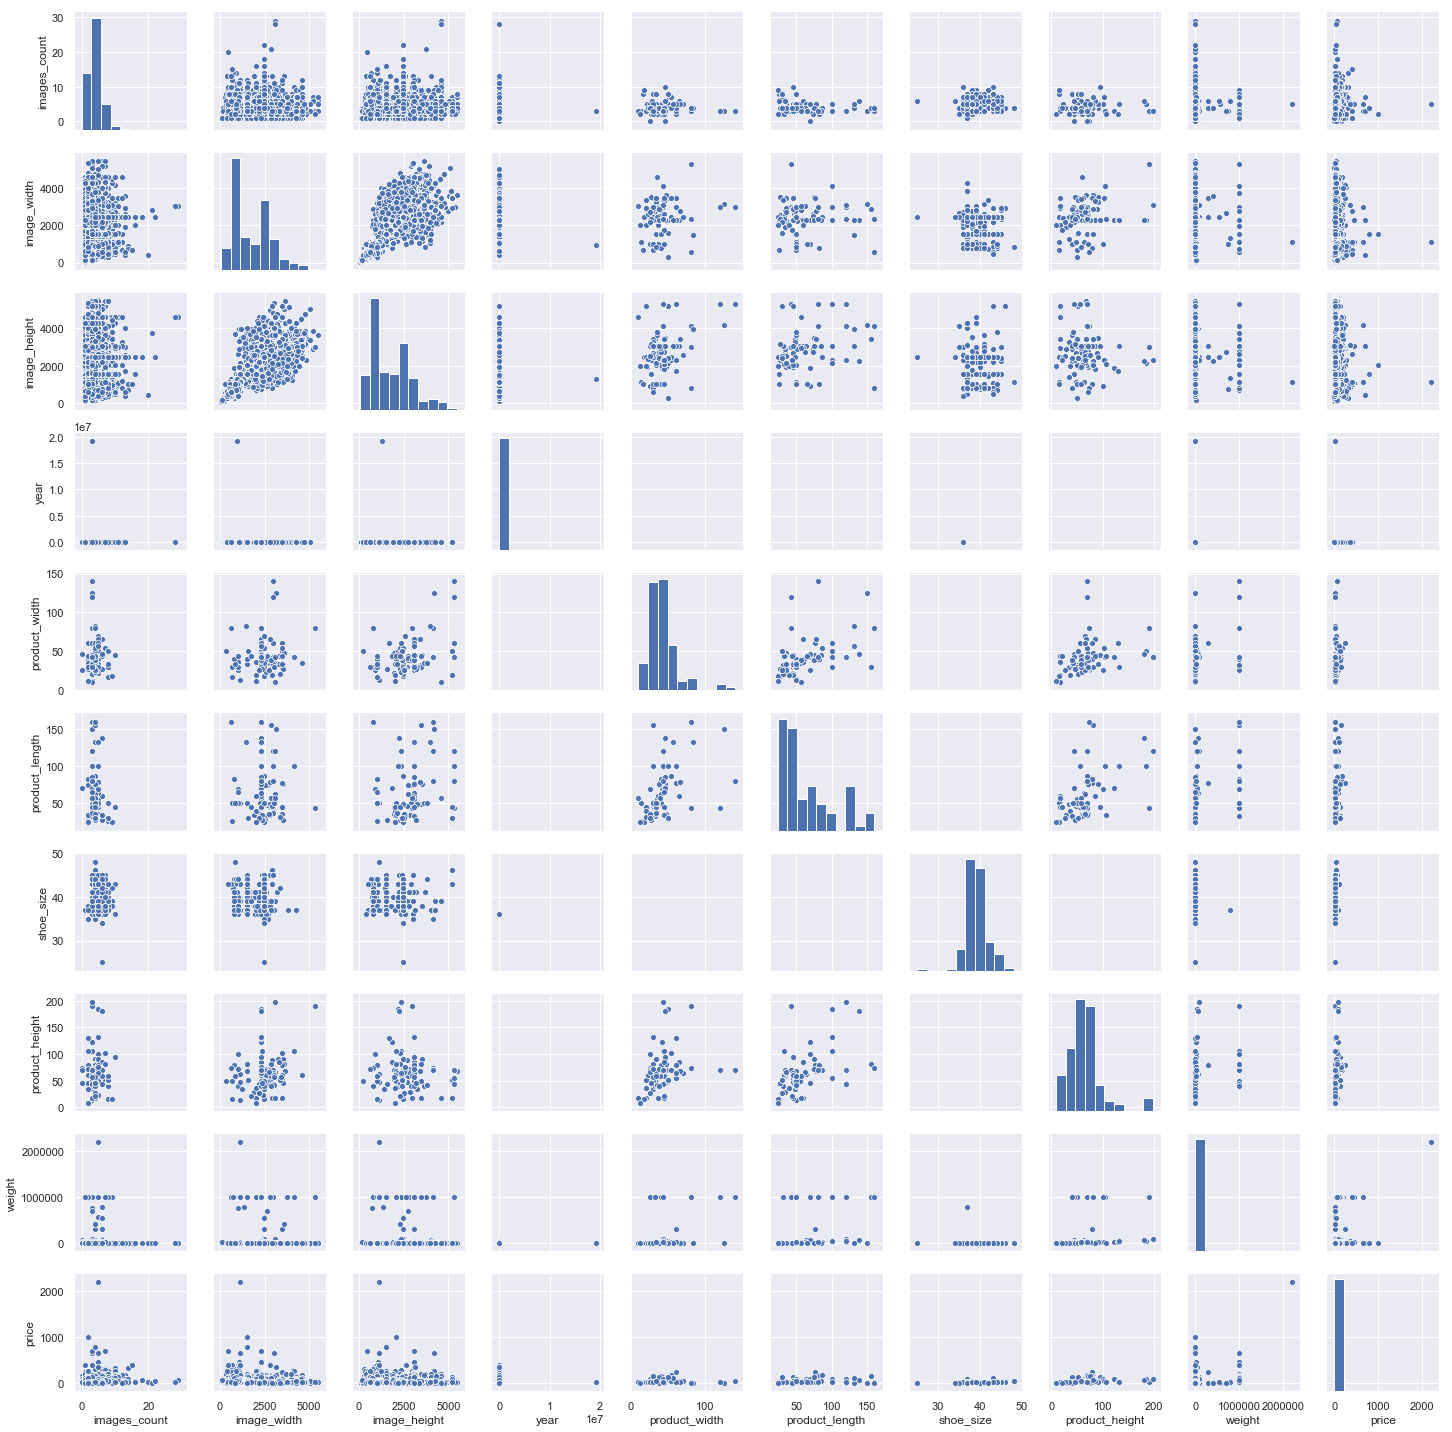

In [15]:
sns.pairplot(train[numerical_columns],size = 2)

# Distribution

In [16]:
def display_distribution(columns_to_consider, train, test):

    plt.figure(figsize=(20,25))
    i = 0

    for column_ in columns_to_consider:
        i += 1
        plt.subplot(5, 4, i)
        sns.distplot(test[column_], label='Test set', hist=False)
        sns.distplot(train[column_], label='Train set', hist=False)
        plt.legend()
        plt.xlabel(column_, fontsize=12)

    plt.show()

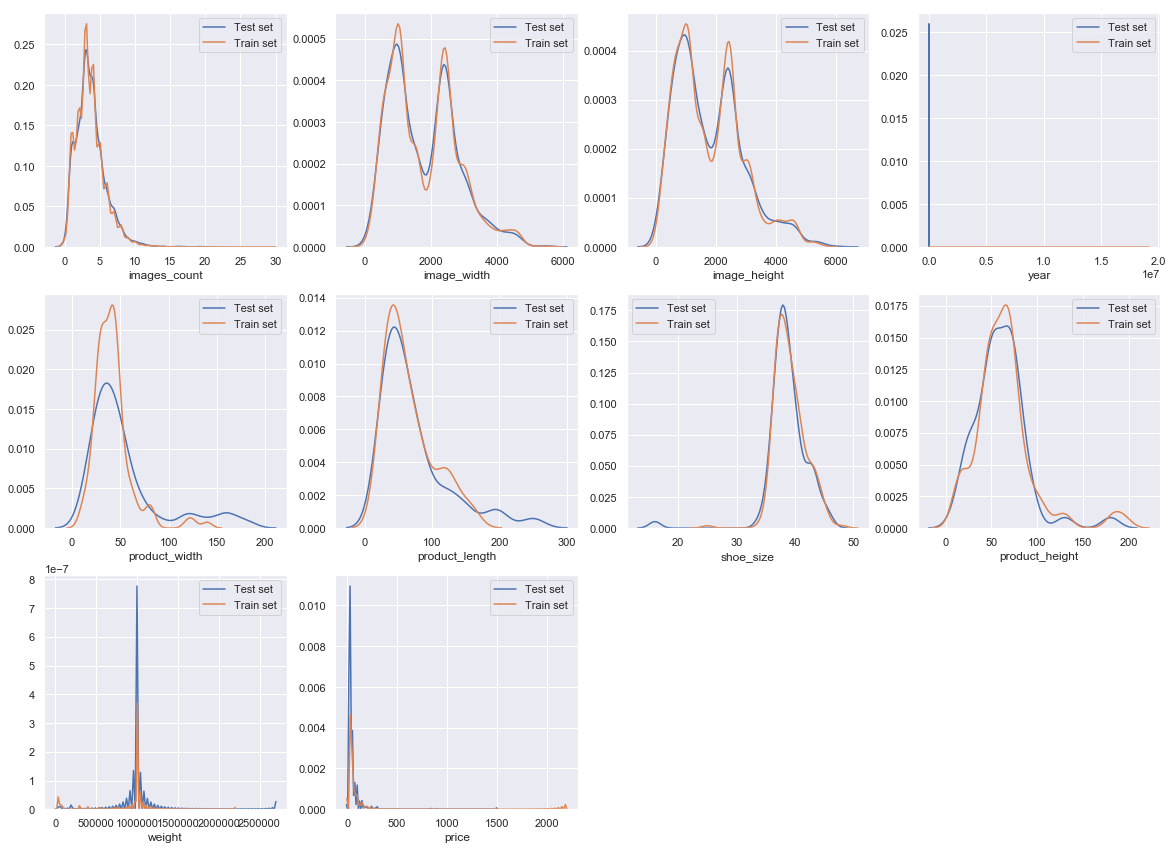

In [17]:
display_distribution(numerical_columns, train, test)